In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
# open data folder from cvs file
path = 'covid19.csv'
df = pd.read_csv(path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numtoday,percentoday
1,35,Ontario,Ontario,31-01-2020,3,0,0,3,NaN,3,3.000
2,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0,1,NaN,1,1.000
3,1,Canada,Canada,31-01-2020,4,0,0,4,NaN,4,4.000
4,35,Ontario,Ontario,08-02-2020,3,0,0,3,NaN,0,0.000


In [3]:
#reject unwanted naming conventions and null data

df.drop(10, axis=1, inplace=True)
df.drop(2,axis=1,inplace=True)
df.drop(0,axis=0,inplace=True)
df.head()

,0,1,3,4,5,6,7,8,9
1,35,Ontario,31-01-2020,3,0,0,3,NaN,3
2,59,British Columbia,31-01-2020,1,0,0,1,NaN,1
3,1,Canada,31-01-2020,4,0,0,4,NaN,4
4,35,Ontario,08-02-2020,3,0,0,3,NaN,0
5,59,British Columbia,08-02-2020,4,0,0,4,NaN,3


In [4]:
#Set header names
headers = ["Province-ID","Province-Name-EN","Date","Confirmed-Cases", "Probable-Cases","Deceased",
         "Total","Total-Today","Precent-Today"]
df.columns = headers
x = 0
df['Total-Today'].replace(np.nan, x , inplace=True)
df.head(100)

,Province-ID,Province-Name-EN,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today,Precent-Today
1,35,Ontario,31-01-2020,3,0,0,3,0,3
2,59,British Columbia,31-01-2020,1,0,0,1,0,1
3,1,Canada,31-01-2020,4,0,0,4,0,4
4,35,Ontario,08-02-2020,3,0,0,3,0,0
5,59,British Columbia,08-02-2020,4,0,0,4,0,3
...,...,...,...,...,...,...,...,...,...
96,13,New Brunswick,13-03-2020,1,0,0,1,44,0
97,12,Nova Scotia,13-03-2020,0,0,0,0,182,0
98,99,Repatriated Travellers,13-03-2020,2,0,0,2,0,1
99,60,Yukon,13-03-2020,0,0,0,0,0,0


In [5]:
#check for missing data 
missing_data = df.isnull()
missing_data.head(5)

,Province-ID,Province-Name-EN,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today,Precent-Today
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False


In [6]:

#run loop to find number of missing objects
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print()

Province-ID
False    447
Name: Province-ID, dtype: int64

Province-Name-EN
False    447
Name: Province-Name-EN, dtype: int64

Date
False    447
Name: Date, dtype: int64

Confirmed-Cases
False    447
Name: Confirmed-Cases, dtype: int64

Probable-Cases
False    447
Name: Probable-Cases, dtype: int64

Deceased
False    447
Name: Deceased, dtype: int64

Total
False    447
Name: Total, dtype: int64

Total-Today
False    447
Name: Total-Today, dtype: int64

Precent-Today
False    447
Name: Precent-Today, dtype: int64



In [7]:
#change types of data from object to int for example
df[["Province-ID", "Confirmed-Cases","Probable-Cases"]] = df[["Province-ID", "Confirmed-Cases","Probable-Cases"]].astype("int")
df[["Deceased","Total","Total-Today"]] = df[["Deceased","Total","Total-Today"]].astype("int")
df[["Precent-Today"]] = df[["Precent-Today"]].astype("float")
#df[["Date"]] = df[["Date"]].astype("datetime64")


In [8]:
df.dtypes


Province-ID           int32
Province-Name-EN     object
Date                 object
Confirmed-Cases       int32
Probable-Cases        int32
Deceased              int32
Total                 int32
Total-Today           int32
Precent-Today       float64
dtype: object

In [9]:
df.head()

,Province-ID,Province-Name-EN,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today,Precent-Today
1,35,Ontario,31-01-2020,3,0,0,3,0,3.0
2,59,British Columbia,31-01-2020,1,0,0,1,0,1.0
3,1,Canada,31-01-2020,4,0,0,4,0,4.0
4,35,Ontario,08-02-2020,3,0,0,3,0,0.0
5,59,British Columbia,08-02-2020,4,0,0,4,0,3.0


In [10]:
#not apparetly useful at this time, However, include for self understanding
df.describe()

,Province-ID,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today,Precent-Today
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000
mean,38.192394,501.633110,7.829978,6.514541,509.463087,16073.852349,64.545861
std,25.963214,1673.694976,61.400017,24.348168,1678.829587,42201.905243,198.515448
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,2.000000,0.000000,0.000000,3.000000,13.000000,0.000000
50%,46.000000,13.000000,0.000000,0.000000,19.000000,881.000000,2.000000
75%,59.000000,174.000000,0.000000,0.000000,178.000000,9868.500000,17.000000
max,99.000000,14404.000000,833.000000,258.000000,14426.000000,323297.000000,1670.000000


In [11]:
#catagorical data

province_counts = df["Province-Name-EN"].value_counts().to_frame()
province_counts.rename(columns={'Province-Name-EN': 'value_counts'}, inplace=True)

province_counts.index.name = 'Province-Name-EN'
province_counts

,value_counts
Province-Name-EN,
Ontario,42
British Columbia,42
Canada,42
Quebec,33
Alberta,28
Newfoundland and Labrador,26
Nova Scotia,26
Saskatchewan,26
Prince Edward Island,26


In [12]:
df['Province-ID'].unique()


array([35, 59,  1, 24, 48, 99, 47, 46, 13, 10, 12, 11, 60, 61, 62])

In [13]:
df['Province-Name-EN'].unique()

array(['Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta',
       'Repatriated Travellers', 'Saskatchewan', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Prince Edward Island', 'Yukon', 'Northwest Territories',
       'Nunavut', 'Repatriated travellers'], dtype=object)

In [14]:
#df_group_one = df[['Province-Name-EN','Date','Confirmed-Cases']]
df.set_index("Province-Name-EN", inplace=True)
df.head()


,Province-ID,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today,Precent-Today
Province-Name-EN,,,,,,,,
Ontario,35,31-01-2020,3,0,0,3,0,3.0
British Columbia,59,31-01-2020,1,0,0,1,0,1.0
Canada,1,31-01-2020,4,0,0,4,0,4.0
Ontario,35,08-02-2020,3,0,0,3,0,0.0
British Columbia,59,08-02-2020,4,0,0,4,0,3.0


In [15]:
# set DF for specific provinces
BC = df.loc['British Columbia']
AB = df.loc['Alberta']
SK = df.loc['Saskatchewan']
MB = df.loc['Manitoba']
ON = df.loc['Ontario']
QC = df.loc['Quebec']
CN = df.loc['Canada']

In [16]:
#determine numebr of days for each province
BC_days = np.linspace(0,len(BC['Date'].index),len(BC['Date'].index)).astype('int')
ON_days = np.linspace(0,len(ON['Date'].index),len(ON['Date'].index)).astype('int')
QC_days = np.linspace(0,len(QC['Date'].index),len(QC['Date'].index)).astype('int') + 9
AB_days = np.linspace(0,len(AB['Date'].index),len(AB['Date'].index)).astype('int') + 14
SK_days = np.linspace(0,len(SK['Date'].index),len(SK['Date'].index)).astype('int') + 16
MB_days = np.linspace(0,len(MB['Date'].index),len(MB['Date'].index)).astype('int') + 16



CN_days = np.linspace(0,len(CN['Date'].index),len(CN['Date'].index)).astype('int')
print(MB_days)

[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 42]


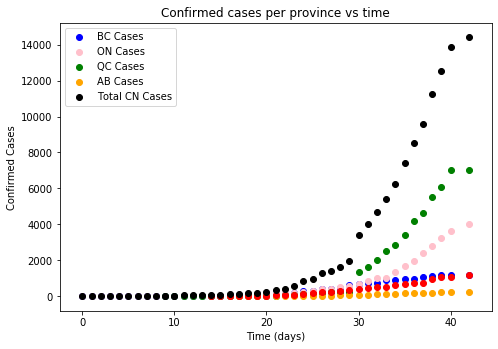

In [17]:
#develop plots for data. Linear plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
BC_Graph = ax.scatter(CN_days, BC['Confirmed-Cases'], color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax.scatter(CN_days, ON['Confirmed-Cases'], color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax.scatter(QC_days, QC['Confirmed-Cases'], color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax.scatter(SK_days, SK['Confirmed-Cases'], color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax.scatter(AB_days, AB['Confirmed-Cases'], color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax.scatter(CN_days, CN['Confirmed-Cases'], color='black')
CN_Graph.set_label('Total CN Cases')

ax.set_xlabel('Time (days)')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed cases per province vs time')
ax.legend()
plt.show()

C:\Users\Paul Kot\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


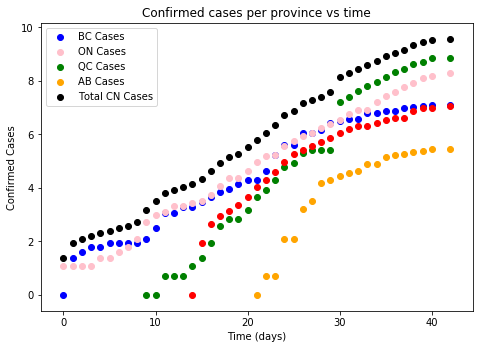

In [18]:
#develop logrithmic plot
fig1=plt.figure()
ax1=fig1.add_axes([0,0,1,1])
BC_Graph = ax1.scatter(CN_days, np.log(BC['Confirmed-Cases']), color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax1.scatter(CN_days, np.log(ON['Confirmed-Cases']), color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax1.scatter(QC_days, np.log(QC['Confirmed-Cases']), color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax1.scatter(SK_days, np.log(SK['Confirmed-Cases']), color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax1.scatter(AB_days, np.log(AB['Confirmed-Cases']), color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax1.scatter(CN_days, np.log(CN['Confirmed-Cases']), color='black')
CN_Graph.set_label('Total CN Cases')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Confirmed Cases')
ax1.set_title('Confirmed cases per province vs time')
ax1.legend()
plt.show()